# **Data Analyst Professional Practical Exam Submission**

I am **Hephzibah Reginald Otuene**,  Graduate Civil Engineer aiming to leverage data analysis in the Architecture, Engineering, and Construction industry.

# **Company Overview**: 

**Pens and Printers** is a long-standing provider of office products since 1984, known for quality and reliability.

The goal of this analysis is to evaluate the effectiveness of three sales methods (Email, Call, Email + Call) in promoting the new product line and to identify which method generates the most customer engagement and revenue. Recommendations will be made to optimize future sales strategies.


## **Introduction**

**Pens and Printers**, a trusted provider of high-quality office products since 1984, who prides itself in providing high quality office products to large organizations, recently launched a new line of stationery aimed at fostering creativity and productivity in the workplace. As purchasing behaviours evolve, understanding the effectiveness of various sales approaches is crucial to maintaining competitive advantage and optimizing resource allocation. This report examines three distinct sales strategies—Email, Call, and a combined Email and Call approach—to assess their impact on customer engagement and revenue generation for the new product line.
This analysis aims to support the sales team in refining their strategy by answering key questions: How many customers responded to each method? What does the revenue distribution look like overall and by approach? Are there observable differences in revenue trends over time for each method? Additionally, based on these findings, recommendations will be made to guide future sales efforts. By identifying the most effective approach, the team can make informed decisions to maximize the return on investment in new product sales.
This report is structured as follows: data validation and cleaning steps are detailed to ensure analysis-ready data, followed by exploratory analysis to uncover insights about customer behavior and sales performance. A business metric is then proposed to facilitate ongoing tracking of the chosen sales strategy's success. Finally, a summary of findings and actionable recommendations are provided to guide future sales tactics and strategic decision-making.


##  **Data Validation**
The initial dataset consists of **15,000 rows and 8 columns.** The criteria listed in the dataset documentation were used to validate each column. The validation and cleaning procedure carried out for every column is described below:

1.	**Week:** Denotes the week that a sale occurred and is calculated as the number of weeks since the product debut, with a maximum value of six weeks. There were no missing data discovered, and every value was within the anticipated range of 1 to 6. As stated in the brief, the data type is integer, and no cleaning is necessary.

2.	**Sales Method:** Categorical variable representing one of three sales methods used (Email, Call, or Email + Call). A total of five different values were discovered, one of which being the incorrect value "em + call." To keep things consistent, the value "em + call" was standardized to "Email + Call". The data type is String, as specified in the brief, and data cleaning was required to fix the category labels. No values are missing.


3.	**Customer ID:**  A distinct number for every client.  verified as distinct in every row, with no values missing. The data type is String, as specified in the brief, and no cleanup is required. 


4.	**Number of Products Sold (nb_sold):**  The number of new products sold to each customer.  Contains 10 distinct values, ranging from a minimum of 7 to a maximum of 16
 As stated in the brief, the data type is integer, and no cleaning is necessary.
 
5.	**Revenue:** Two decimal places are recorded for the sales revenue. includes 1074 NA values (7.2%) and 855 unique values. According to the brief, the data type is numeric; nevertheless, further actions might be necessary to deal with missing numbers based on the requirements of the analysis.

6.	**Years as Customer(years_as_customer):** The length of time the client has been with the business (since its establishment in 1984). It has 32 unique values and 2 values greater than 39, with no missing values, i'll analyse it so it'll range from 0 to 39 at most.
The data type is integer, as specified in the brief, and no cleaning is required.


7.	**Number of Site Visits (nb_site_visits):**  How many times throughout the previous six months the customer visited the website.  comprises 23 unique values, ranging from at least 15 to a maximum of 37, and has no missing values. The data type is integer, as specified in the brief, and no cleaning is required.


8.	**State:** The customer's location (the state in which purchases are dispatched). There are no missing values among the 50 unique values that represent the states of the United States.
As stated in the brief, the data type is String, and no cleanup is necessary. 

Following this step, additional data cleaning was executed using Excel Power Query, which included removing duplicates and standardizing values.

In [157]:
import os
print(os.listdir())

['customers_salesmethod.png', 'customers_state.png', 'productssold_distribution.png', 'correlation_heatmap.png', 'revenue_sales_method.png', 'avg_revenue_overweeks.png', 'revenue_distribution.png', 'productssold_revenue.png', 'data_analyst_certification.csv', 'product_sales.csv', 'revenue_site_visits.png', 'notebook.ipynb', 'data_analyst_certification_cleaned.csv', 'data_analyst_certification_revenue.csv', 'cumulativecustomers_state.png', 'Top10states_customers.png', 'revenue_overtime_salesmethod.png', 'avg_revenue_yearscustomer.png']


In [16]:
sales_data = pd.read_csv("data_analyst_certification.csv")

sales_data.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [33]:
import pandas as pd
import numpy as np

# Load the dataset
sales_data = pd.read_csv("data_analyst_certification.csv")

# Replace 'null' string values with NaN
sales_data['revenue'] = sales_data['revenue'].replace('null', np.nan).astype(float)

# Check for missing values in the 'revenue' column
print("Missing values in 'revenue' column before imputation:", sales_data['revenue'].isna().sum())

# Perform group-based imputation with the median revenue within each 'sales_method' group
sales_data['revenue'] = sales_data.groupby('sales_method')['revenue'].transform(lambda x: x.fillna(x.median()))

# Verify that imputation filled the missing values
print("Missing values in 'revenue' column after imputation:", sales_data['revenue'].isna().sum())

# Save the updated DataFrame to a new CSV file
sales_data.to_csv("data_analyst_certification_revenue.csv", index=False)



Missing values in 'revenue' column before imputation: 1074
Missing values in 'revenue' column after imputation: 0


In [34]:
sales_data.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,95.58,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,95.58,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [22]:
sales_data[sales_data['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [39]:
# find all values > 39 and replace with 39
sales_data.loc[sales_data['years_as_customer'] > 39, 'years_as_customer'] = 39

# check to see if replacement worked
sales_data[sales_data['years_as_customer'] > 39]

# Save the updated DataFrame to a new CSV file
sales_data.to_csv("data_analyst_certification_cleaned.csv", index=False)


In [83]:
# Check unique values in the 'sales_method' column
unique_sales_methods = df['sales_method'].unique()
print(unique_sales_methods)


['Email' 'Email + Call' 'Call']


In [93]:
# Standardize sales_method values
df['sales_method'] = df['sales_method'].str.strip()  # Remove leading/trailing spaces
df['sales_method'] = df['sales_method'].str.title()  # Capitalize first letter of each word

# Optional: Replace incorrect values
df['sales_method'] = df['sales_method'].replace({'email': 'Email'})  # Example of correcting a value

# Check the unique values again after cleaning
unique_sales_methods_cleaned = df['sales_method'].unique()
print(unique_sales_methods_cleaned)

df.to_csv("data_analyst_certification_cleaned.csv", index=False)


['Email' 'Email + Call' 'Call']


In [152]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,95.58,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,95.58,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


## Data Validation and Imputation Summary

I found 1,074 missing entries in the'revenue' column throughout the data validation procedure. I used the median revenue for each'sales_method' to construct group-based imputation in order to fix this. This approach improves the accuracy of our dataset by guaranteeing that the imputed values accurately reflect the particular sales scenario.
The following are the outcomes of the imputation process:
1. The'revenue' column has 1,074 missing entries prior to imputation.
2. After imputation, the'revenue' column has zero missing values.


Furthermore, acknowledging that the business has been in business since 1984, I standardized the 'years_as_customer' values by capping any entries higher than 39 to 39.


I also fixed a discrepancy in the'sales_method' column, where the fifth item "email" was found to be incorrect. To provide uniformity throughout the dataset, this was changed to "Email".

With no missing values currently, the dataset remains *15,000 rows and 8 columns*. Now that the data has been carefully cleaned and verified, it is ready for additional analysis and will serve as a strong basis for the sales team's strategic choices.

In [85]:
df.shape

(15000, 8)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [87]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.098267,10.084667,95.565926,4.963800,24.990867
std,1.656420,1.812213,47.985182,5.026295,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.650000,1.000000,23.000000
50%,3.000000,10.000000,90.950000,3.000000,25.000000
75%,5.000000,11.000000,107.750000,7.000000,27.000000
max,6.000000,16.000000,238.320000,39.000000,41.000000


### Revenue Analysis 

This analysis explores revenue generated by different sales methods—Call, Email, and Email + Call—over time and in relation to customer engagement (measured by site visits). The goal is to identify which methods yield the highest revenue and provide actionable insights for future strategy.

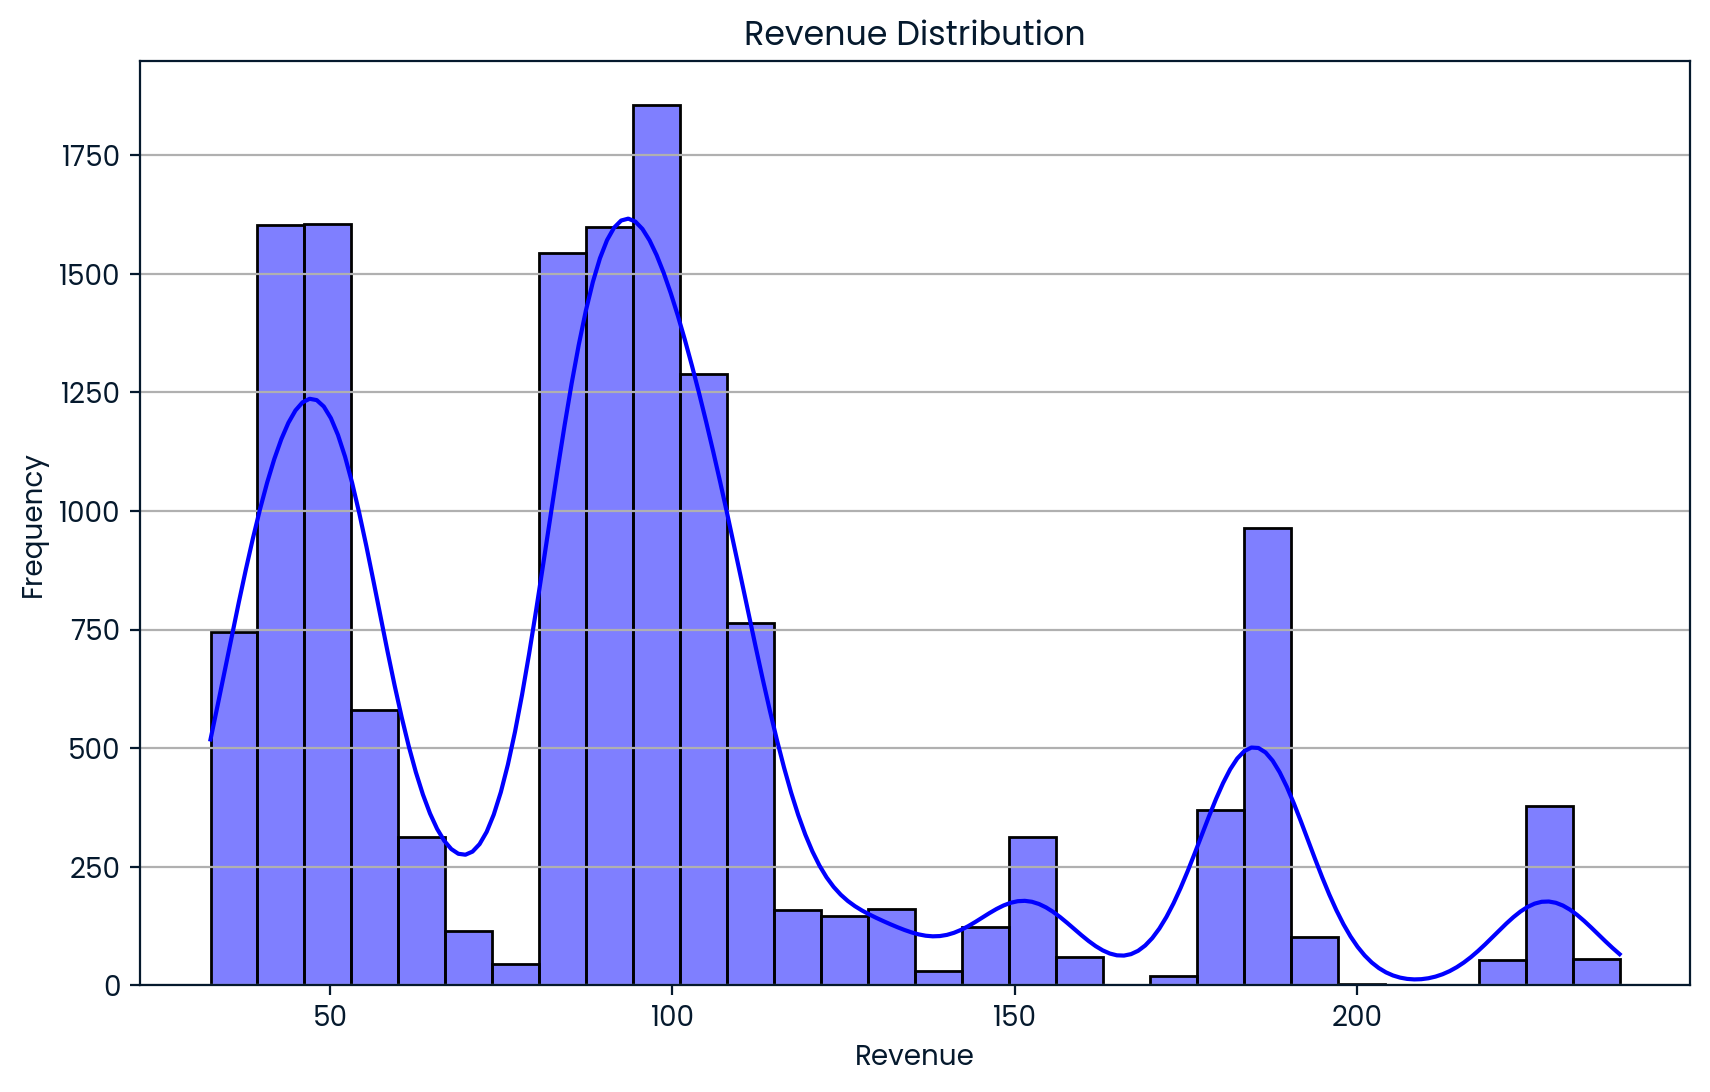

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("data_analyst_certification_cleaned.csv")


# Histogram for Revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['revenue'], bins=30, kde=True, color='blue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.savefig('revenue_distribution.png')
plt.show()

**Revenue by Sales Method (Box Plot)**

**Email + Call** method has the largest median revenue among the various ways, with a wide range that extends to higher income levels. The revenue from this strategy is likewise more variable. With fewer outliers and a median revenue of about 100, the **Email** technique is more steady than "Email + Call." Consistently low returns are shown by the narrow spread and lowest median revenue displayed by the **Call** approach.


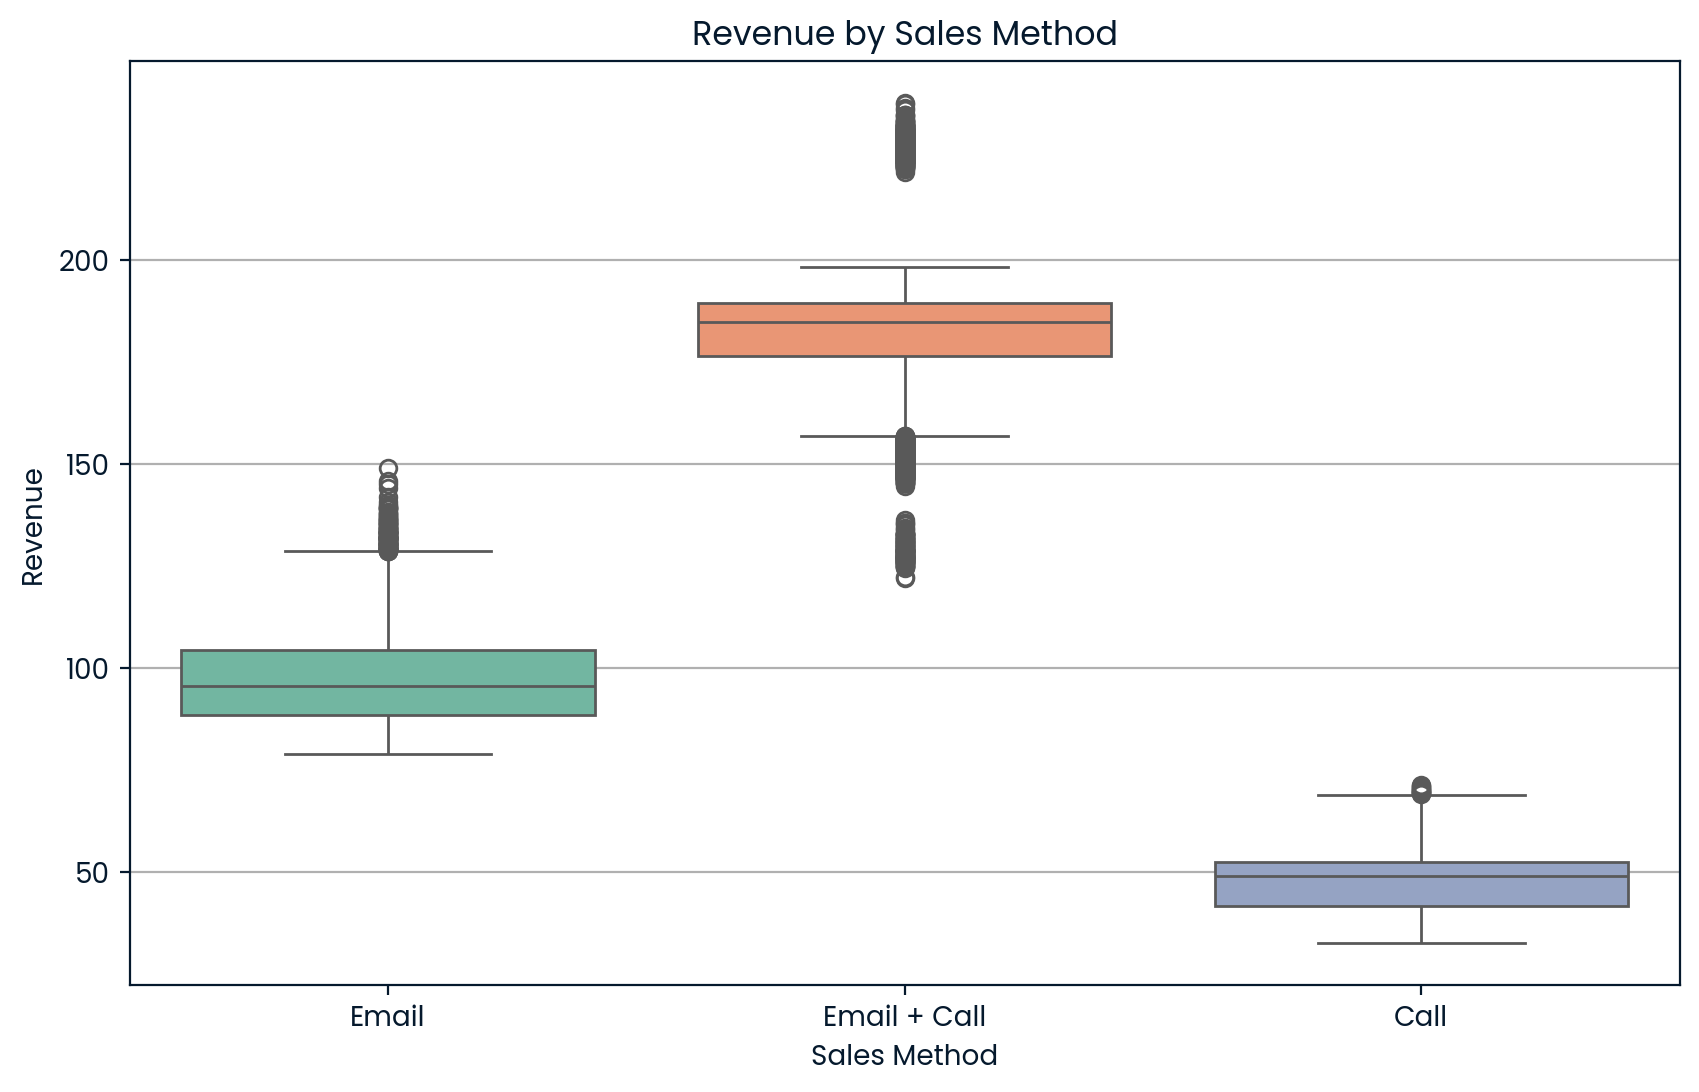

In [138]:
# Box Plot for Revenue by Sales Method
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_method', y='revenue', data=df, palette='Set2')
plt.title('Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.grid(axis='y')
plt.savefig('revenue_sales_method.png')
plt.show()

**Revenue vs. Number of Site Visits by Sales Method**

**Email + Call** method reached higher revenue values as the number of site visits increased. This method's data points extend above 200 in revenue, indicating its effectiveness at converting site visits into higher revenue amounts.
**Email** method maintained a revenue range around 100, consistently achieving mid-range revenue values but not reaching the higher values seen with the combination method.
**Call** method showed lower revenue levels, generally below 50, across different site visit levels, suggesting limited effectiveness even with increased site traffic.

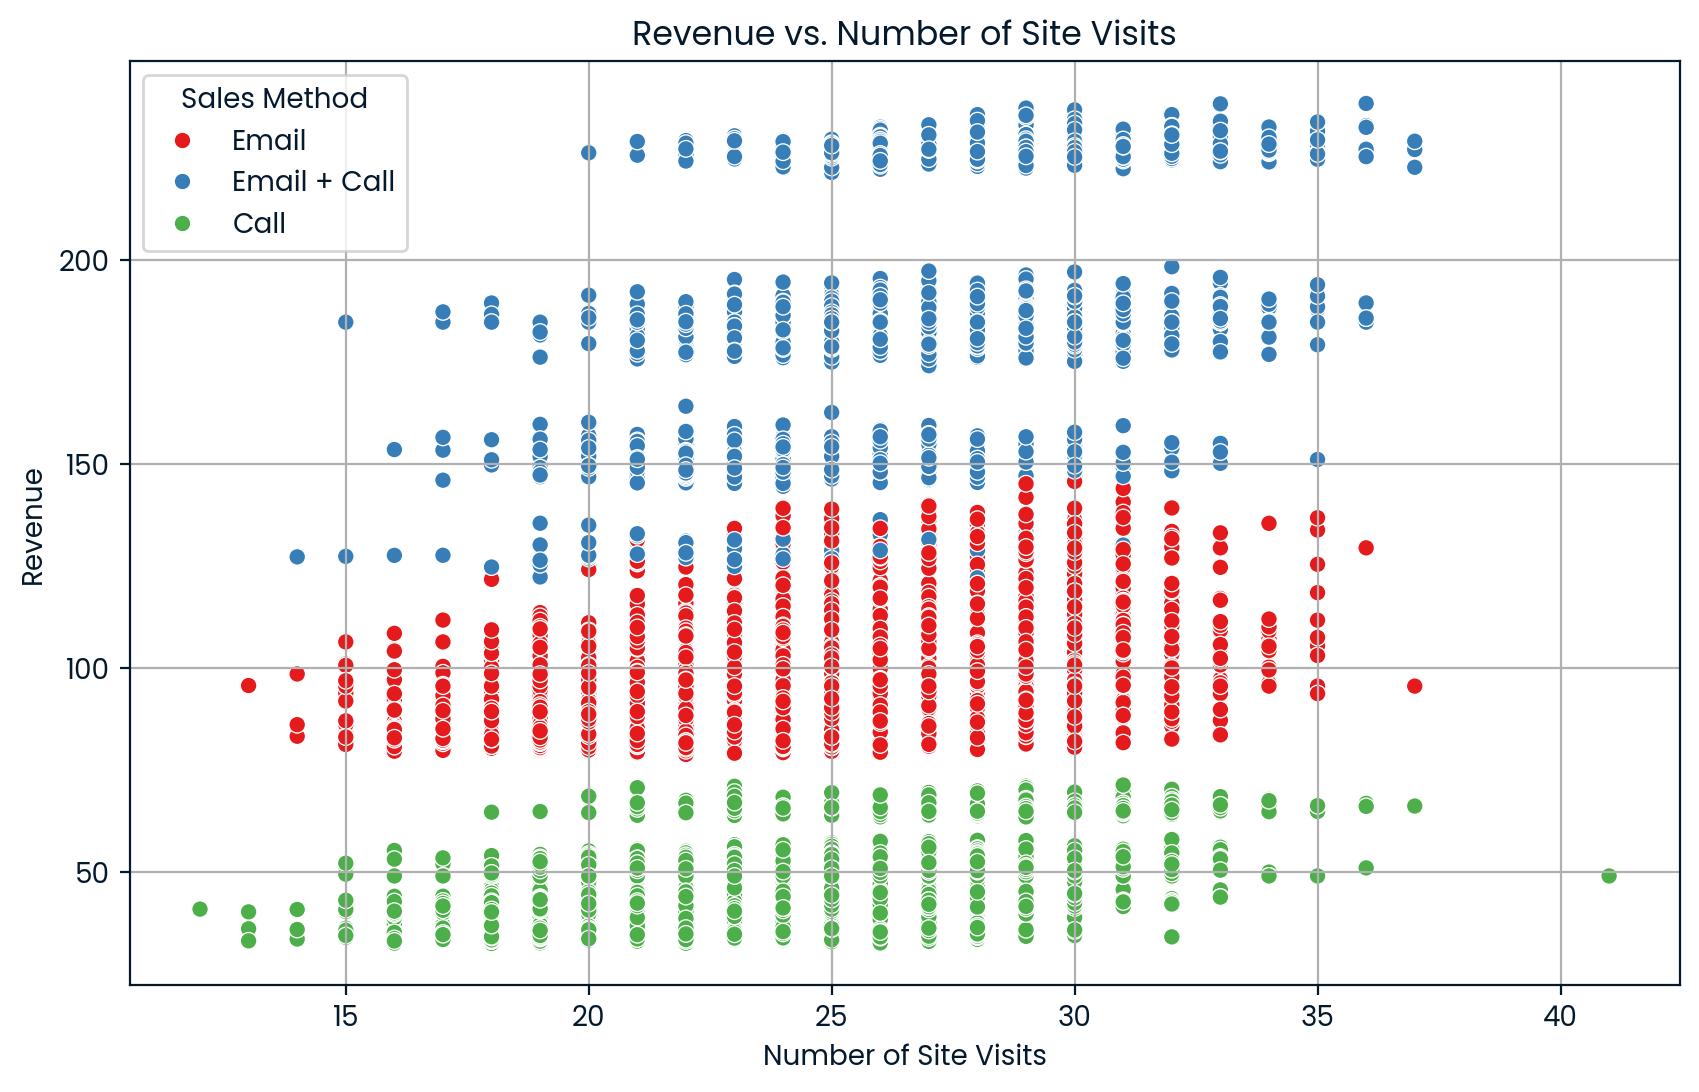

In [140]:
# Scatter Plot for Revenue vs. Number of Site Visits
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nb_site_visits', y='revenue', data=df, hue='sales_method', palette='Set1')
plt.title('Revenue vs. Number of Site Visits')
plt.xlabel('Number of Site Visits')
plt.ylabel('Revenue')
plt.legend(title='Sales Method')
plt.grid()
plt.savefig('revenue_site_visits.png')
plt.show()


**Revenue Over Time by Sales Method**

**Email** method initially generated the highest revenue, peaking around 250,000 in the first week. However, its revenue declined sharply over time, with a substantial drop by week six.
**Email + Call** method showed steady growth over the first few weeks, eventually overtaking the "Email" method in week four and peaking in week five before a slight decline in week six.
**Call** method generated the lowest revenue throughout the period. It showed a gradual, steady increase up until week four, followed by a slight decline in the last two weeks.

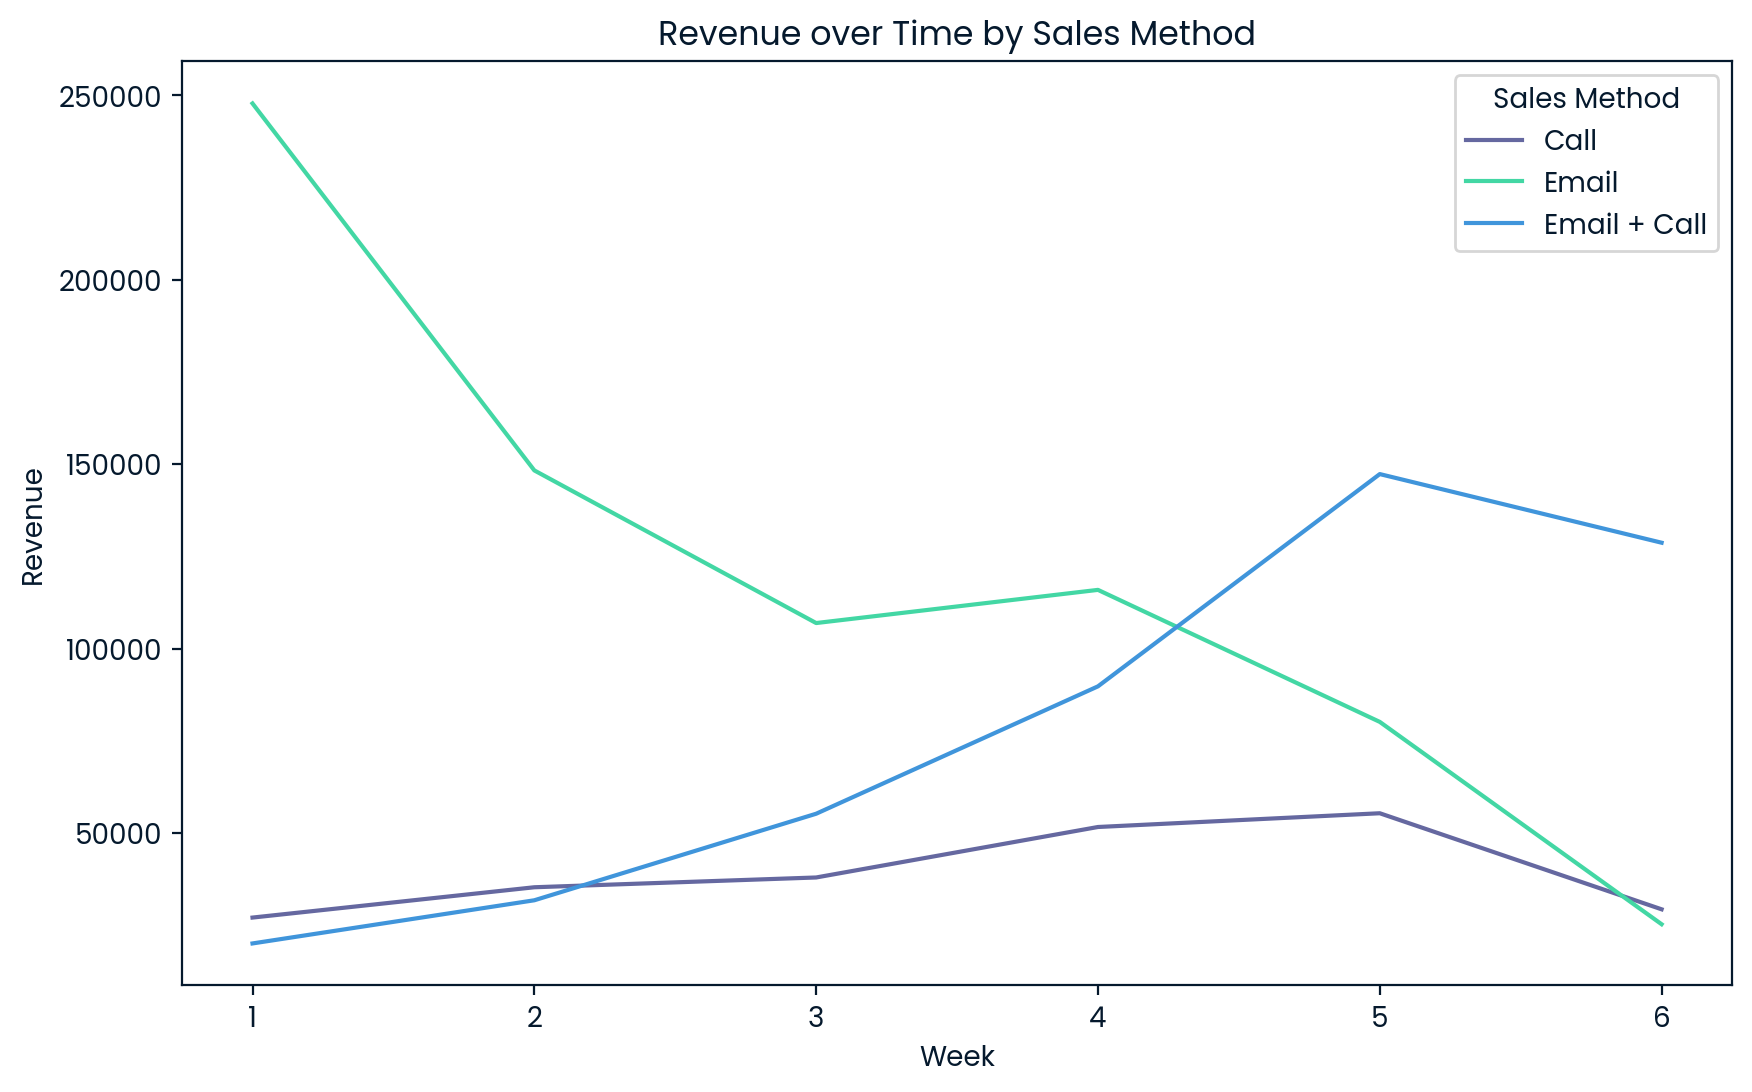

In [141]:
# Grouping and summing revenue over time by sales method
revenue_over_time = df.groupby(['week', 'sales_method'])['revenue'].sum().unstack()

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot the revenue over time
revenue_over_time.plot(ax=plt.gca())  # Pass the current axes to the plot

# Set the labels and title
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Revenue over Time by Sales Method')
plt.legend(title='Sales Method')
plt.savefig('revenue_overtime_salesmethod.png')
plt.show()


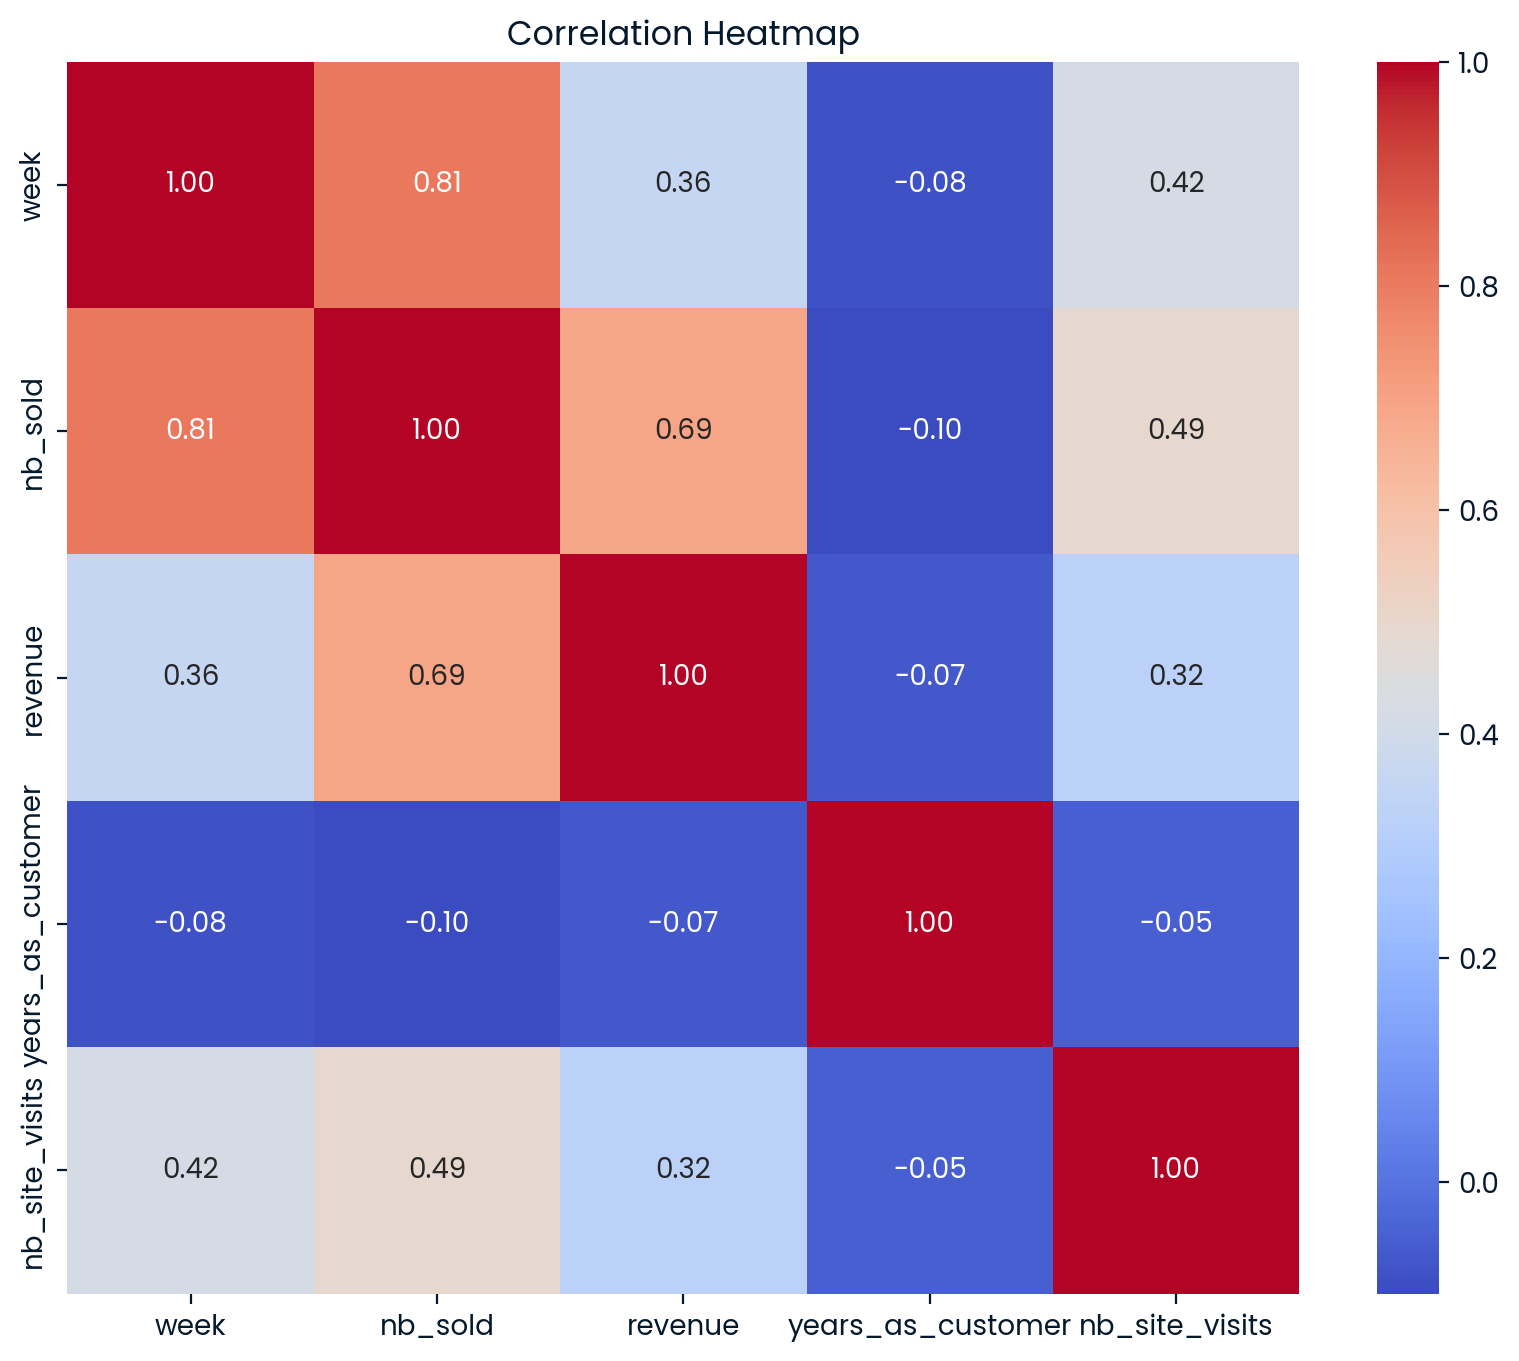

In [139]:
# Correlation Heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()


The analysis of the three graphs shows that the "Email + Call" method consistently produces the highest revenue, especially as site visits increase. Although the "Email" method initially generates high revenue, it declines over time, while "Call" alone consistently yields the lowest revenue. Overall, combining email and calls proves to be the most effective strategy, achieving higher revenue on average compared to using either method independently.

## Customer Behavior

**Analysis of "Number of Customers by Sales Method" (Bar Chart)**

The bar chart shows customer distribution across different sales methods:  Email was the most common sales method, engaging 7,466 customers. Call reached 4,962 customers. Email + Call reached the fewest, at 2,572 customers. This distribution suggests that email, likely due to its efficiency and low time demand, was used most frequently. 

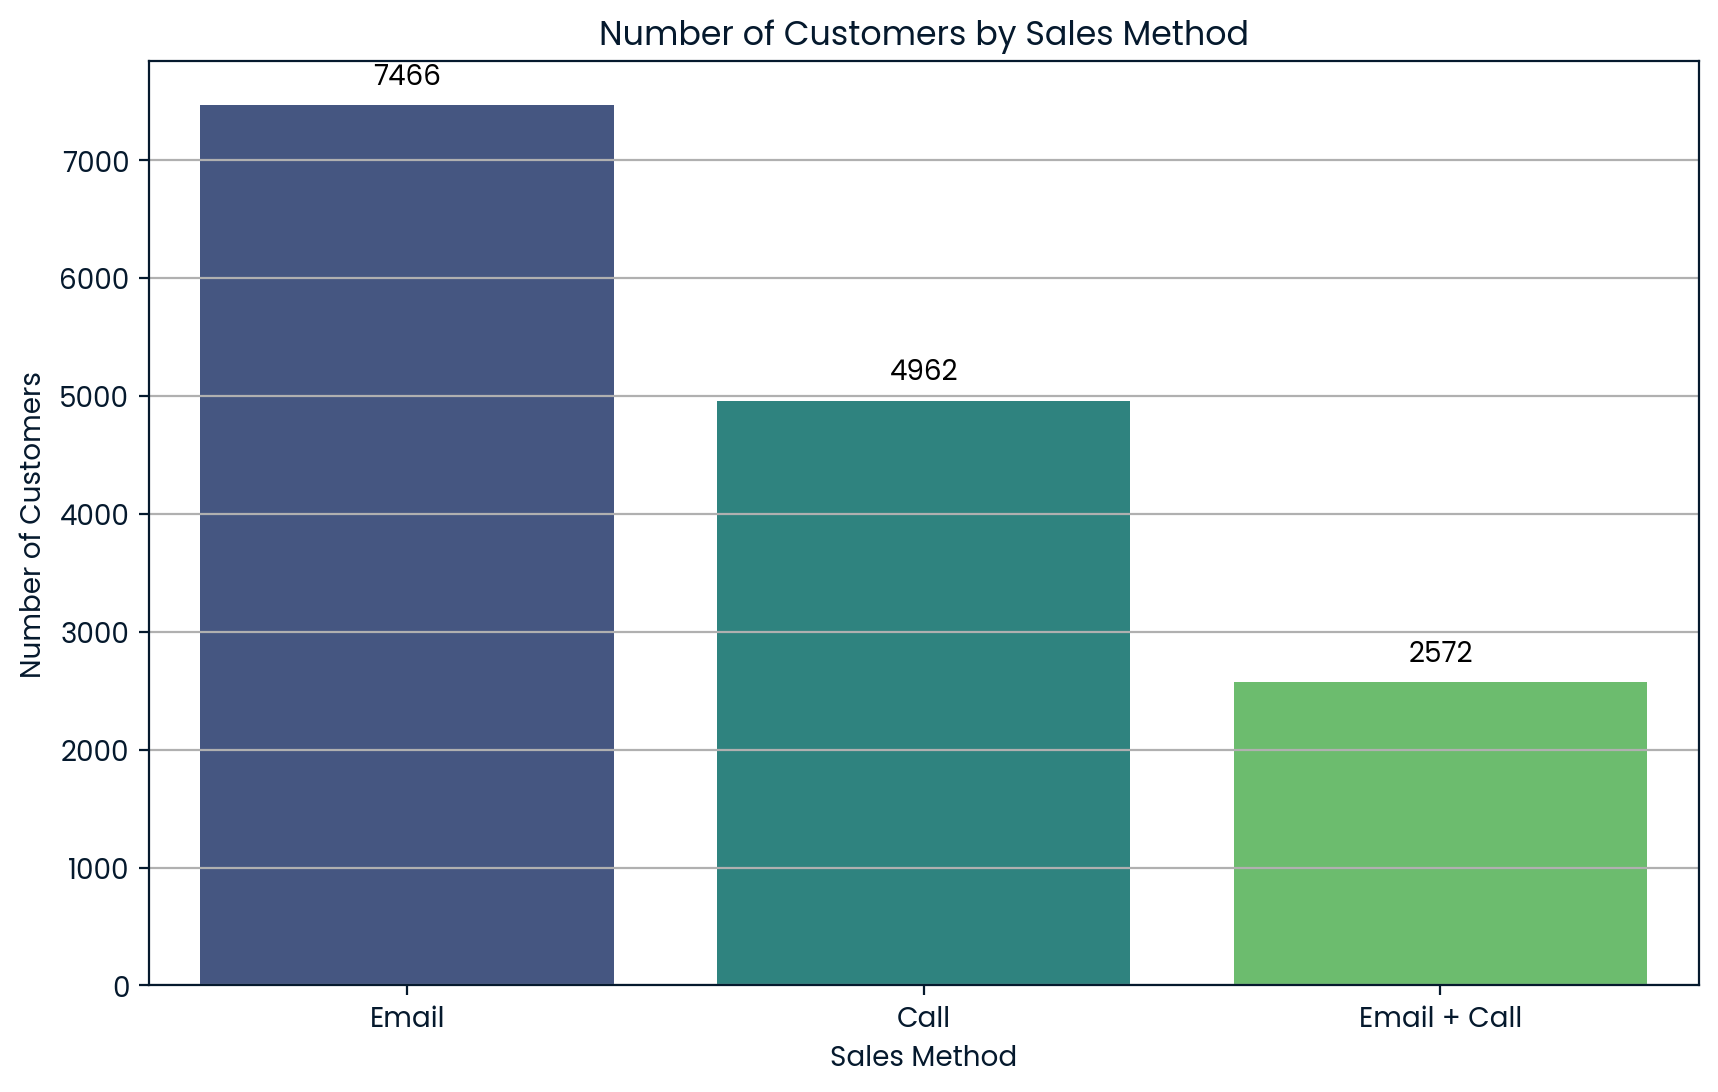

In [142]:
# Bar Chart for Number of Customers by Sales Method
customer_counts = df['sales_method'].value_counts().reset_index()
customer_counts.columns = ['Sales Method', 'Number of Customers']

plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Method', y='Number of Customers', data=customer_counts, palette='viridis')
plt.title('Number of Customers by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.grid(axis='y')

# Add value labels
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', 
                 fontsize=10, color='black', 
                 xytext=(0, 5), textcoords='offset points')
plt.savefig('customers_salesmethod.png')
plt.show()


**Product Sales versus Revenue Analysis**

The relationship between the quantity of products sold and the associated revenue is displayed in the scatter plot. The distribution of points across various revenue brackets for comparable product quantities suggests that consumer buying patterns vary. For instance, revenue can vary greatly for the same number of products sold (e.g., 10 or 12 products), indicating that various pricing or discounts have an impact on consumer purchases.
This variation may suggest that consumers' willingness to pay for comparable volumes is impacted by a variety of factors (such discounts or upsells).
Although there isn't a steady, linear trend, increasing product quantities sold typically translate into more revenue despite this fluctuation.


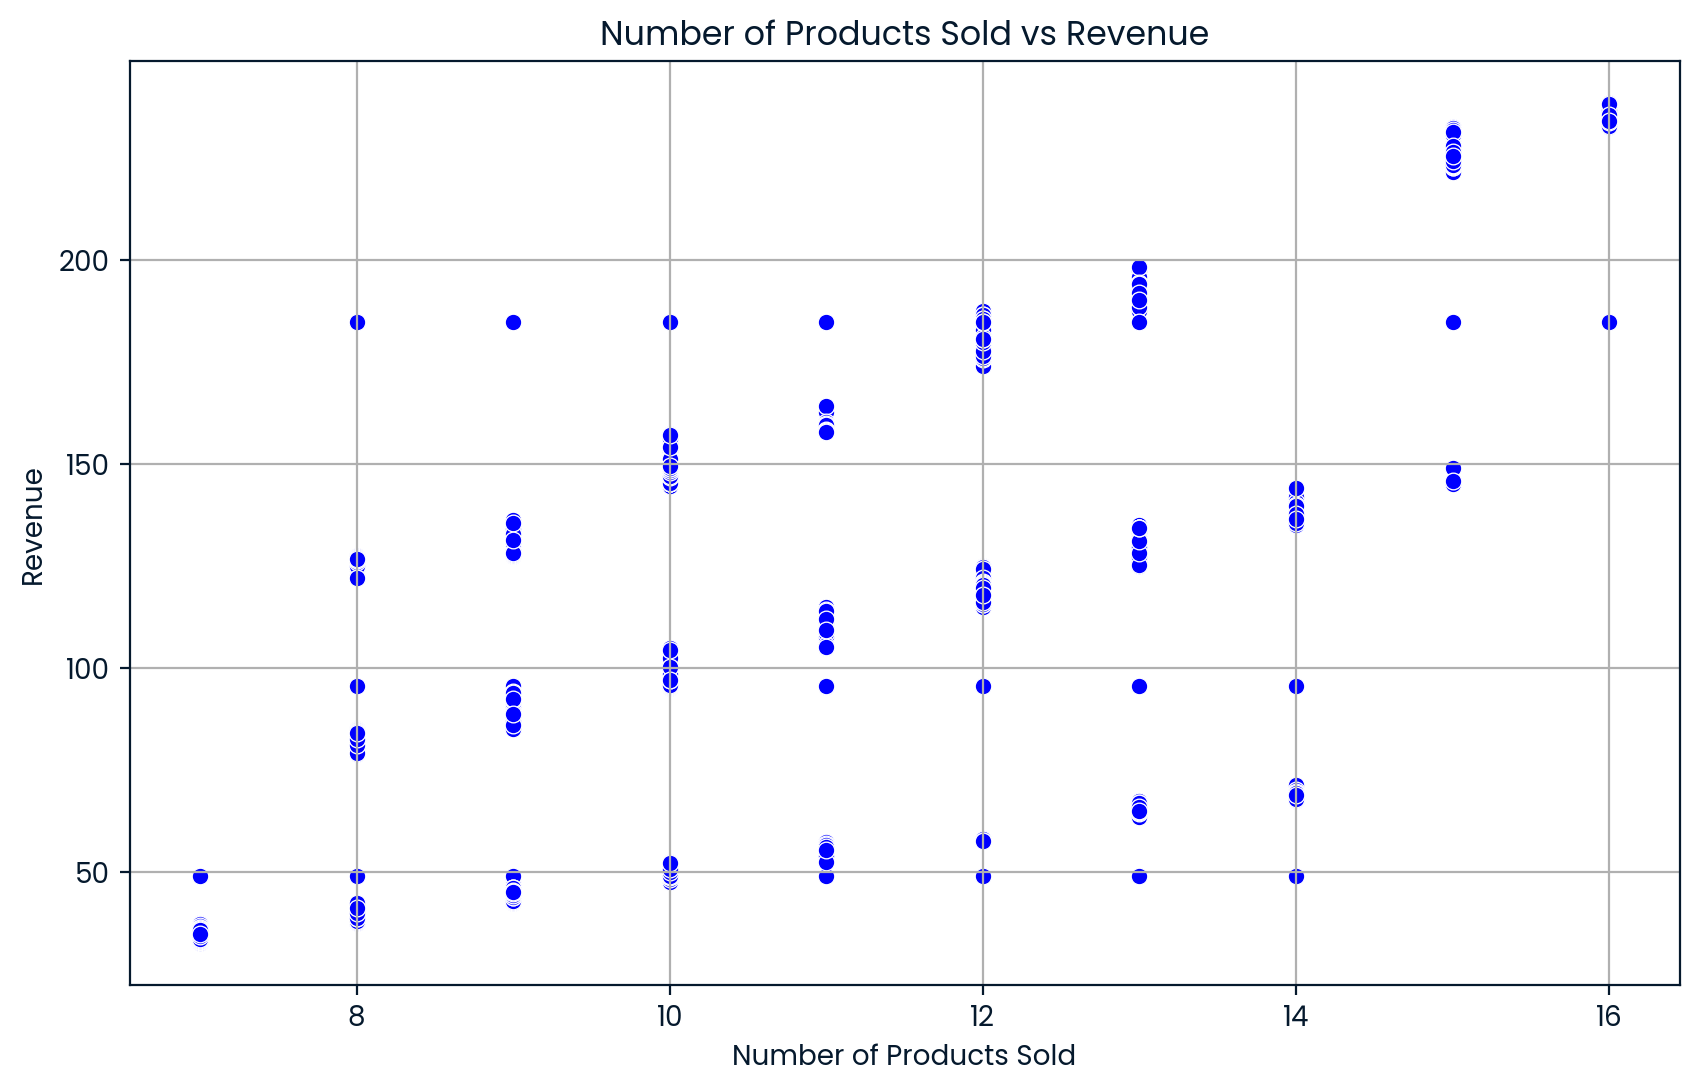

In [144]:
# Scatter plot for Number of Products Sold vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='nb_sold', y='revenue', color='blue')
plt.title('Number of Products Sold vs Revenue')
plt.xlabel('Number of Products Sold')
plt.ylabel('Revenue')
plt.grid()
plt.savefig('productssold_revenue.png')
plt.show()


## Product Analysis

**Number of Products Sold Distribution**
The histogram shows a right-skewed distribution with most of the frequencies concentrated around the 8-12 range. Peaks at around 9 and 11 indicate these are the most common product quantities sold, while fewer sales are seen at higher values (13-16). The right-skew suggests that the majority of sales fall within a lower range, with occasional higher sales. This could indicate a general preference for smaller purchase quantities or limitations in demand for higher quantities.


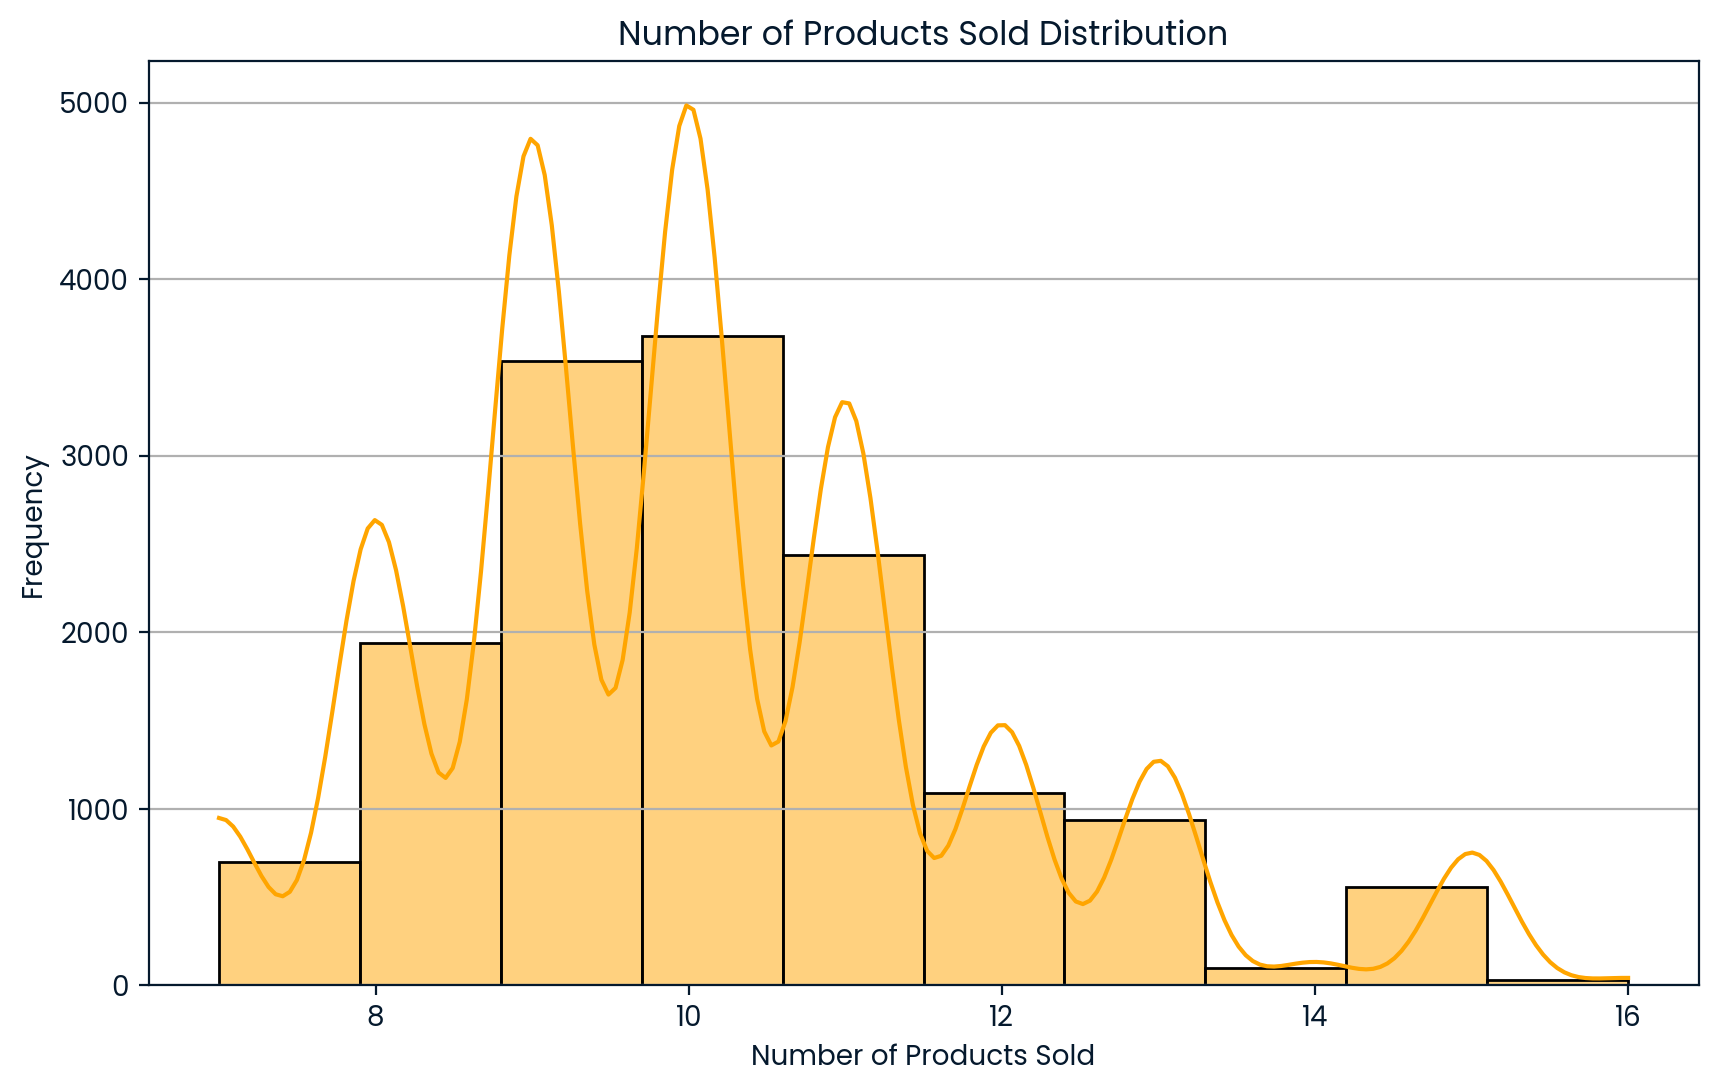

In [146]:
# Histogram for Number of Products Sold
plt.figure(figsize=(10, 6))
sns.histplot(df['nb_sold'], bins=10, kde=True, color='orange')
plt.title('Number of Products Sold Distribution')
plt.xlabel('Number of Products Sold')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.savefig('productssold_distribution.png')
plt.show()


**Average Revenue Over Weeks**

The average revenue shows a gradual increase over the six-week period. Starting at approximately 79.25 in Week 1, it peaks at 149.20 in Week 6. After an initial fluctuation between Week 2 and Week 4, there’s a noticeable upward trend from Week 4 onwards, indicating steady growth in revenue.  The steady rise from Week 4 suggests that any actions taken during that period—such as marketing, new product launches, or pricing adjustments—may have positively impacted revenue.


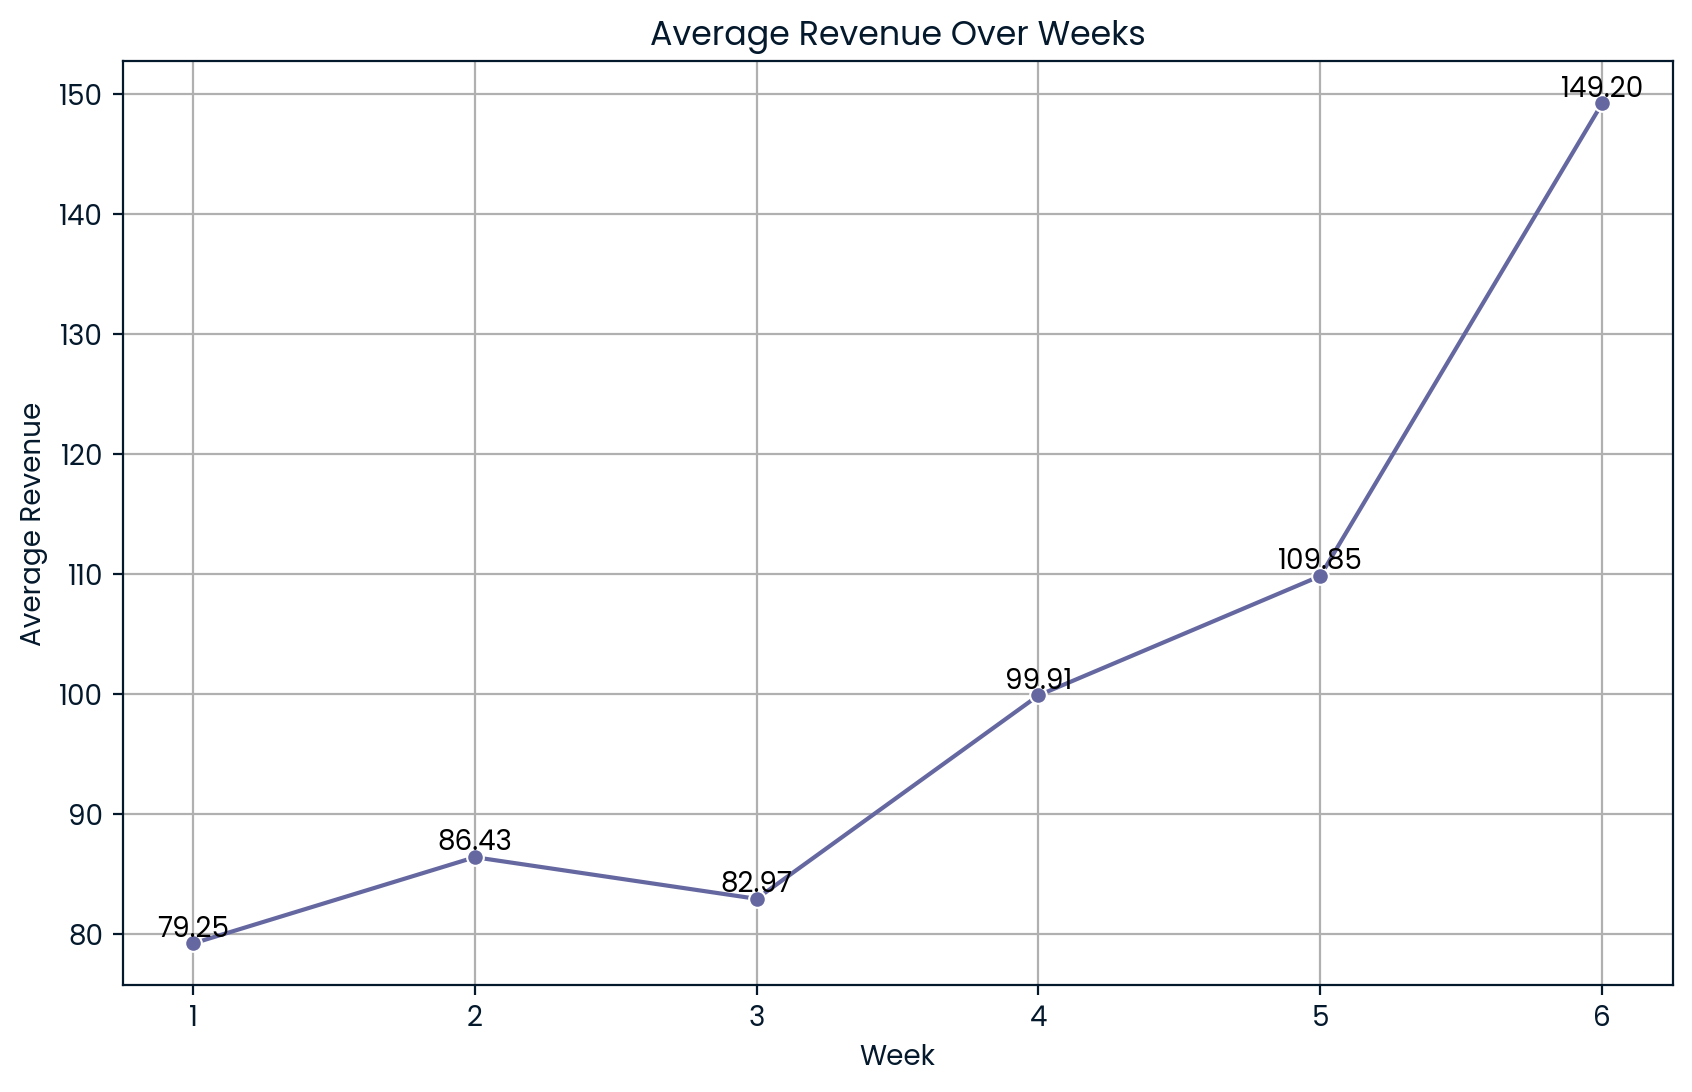

In [147]:
# Line Plot for Average Revenue Over Weeks
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='week', y='revenue', estimator='mean', ci=None, marker='o')
plt.title('Average Revenue Over Weeks')
plt.xlabel('Week')
plt.ylabel('Average Revenue')
plt.grid()

# Add value labels to each point in the line plot
for index, row in df.groupby('week')['revenue'].mean().iteritems():
    plt.text(index, row, f'{row:.2f}', 
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontsize=10, 
             color='black')
plt.savefig('avg_revenue_overweeks.png')
plt.show()


## Customer Retention and Loyalty

The graph shows that average revenue per customer initially drops within the first few years but stabilizes between years 3 and 15. After year 15, average revenue begins to gradually increase, with significant peaks around years 27 and 37. This suggests that long-term customers, particularly those who have been with the company for over 15 years, tend to generate more revenue, possibly indicating increased loyalty or spending over time.

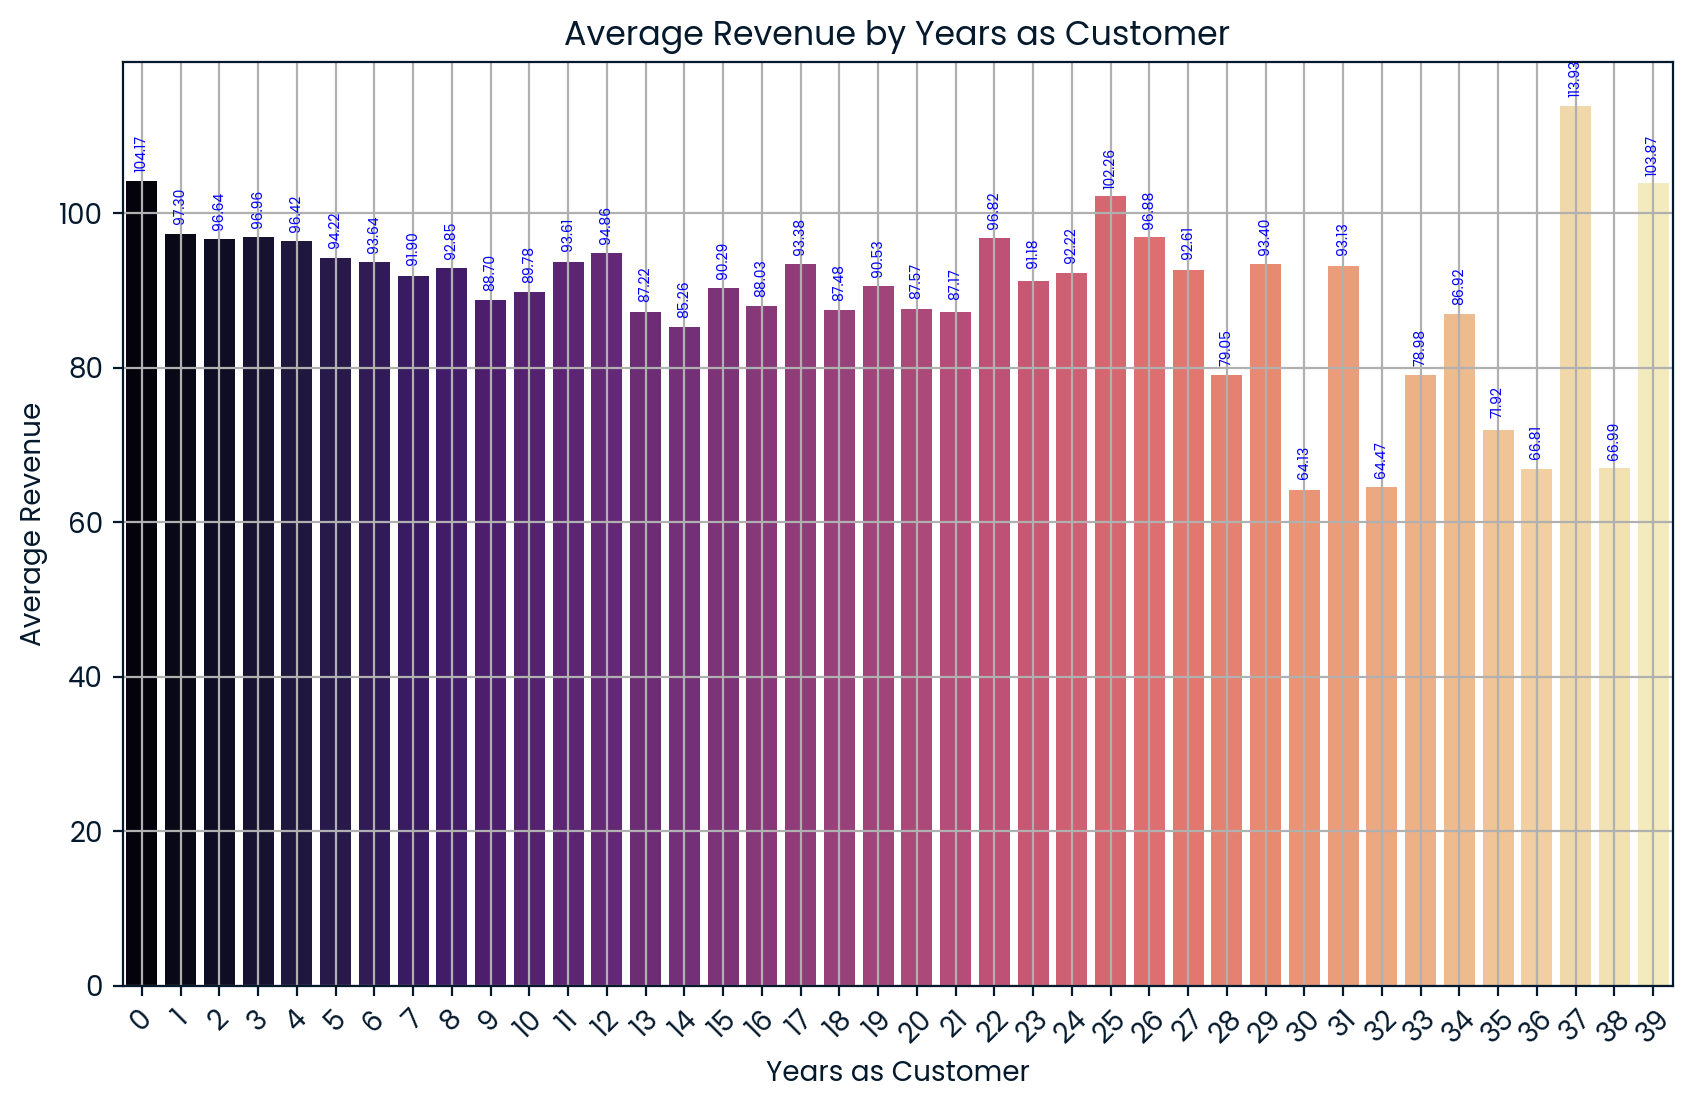

In [148]:
# Bar Chart for Average Revenue by Years as Customer
avg_revenue_by_years = df.groupby('years_as_customer')['revenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='years_as_customer', y='revenue', data=avg_revenue_by_years, palette='magma')
plt.title('Average Revenue by Years as Customer')
plt.xlabel('Years as Customer')
plt.ylabel('Average Revenue')
plt.grid()

# Add vertical value labels on the bars, raised up a little
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center',  # Center the text vertically
                 fontsize=5, color='blue', 
                 xytext=(0, 10), textcoords='offset points',  # Raise the label by 5 points
                 rotation=90)  # Rotate the label 90 degrees

plt.xticks(rotation=45, fontsize=10)  # Adjust the rotation and font size

plt.savefig('avg_revenue_yearscustomer.png')
plt.show()


## Regional Insights

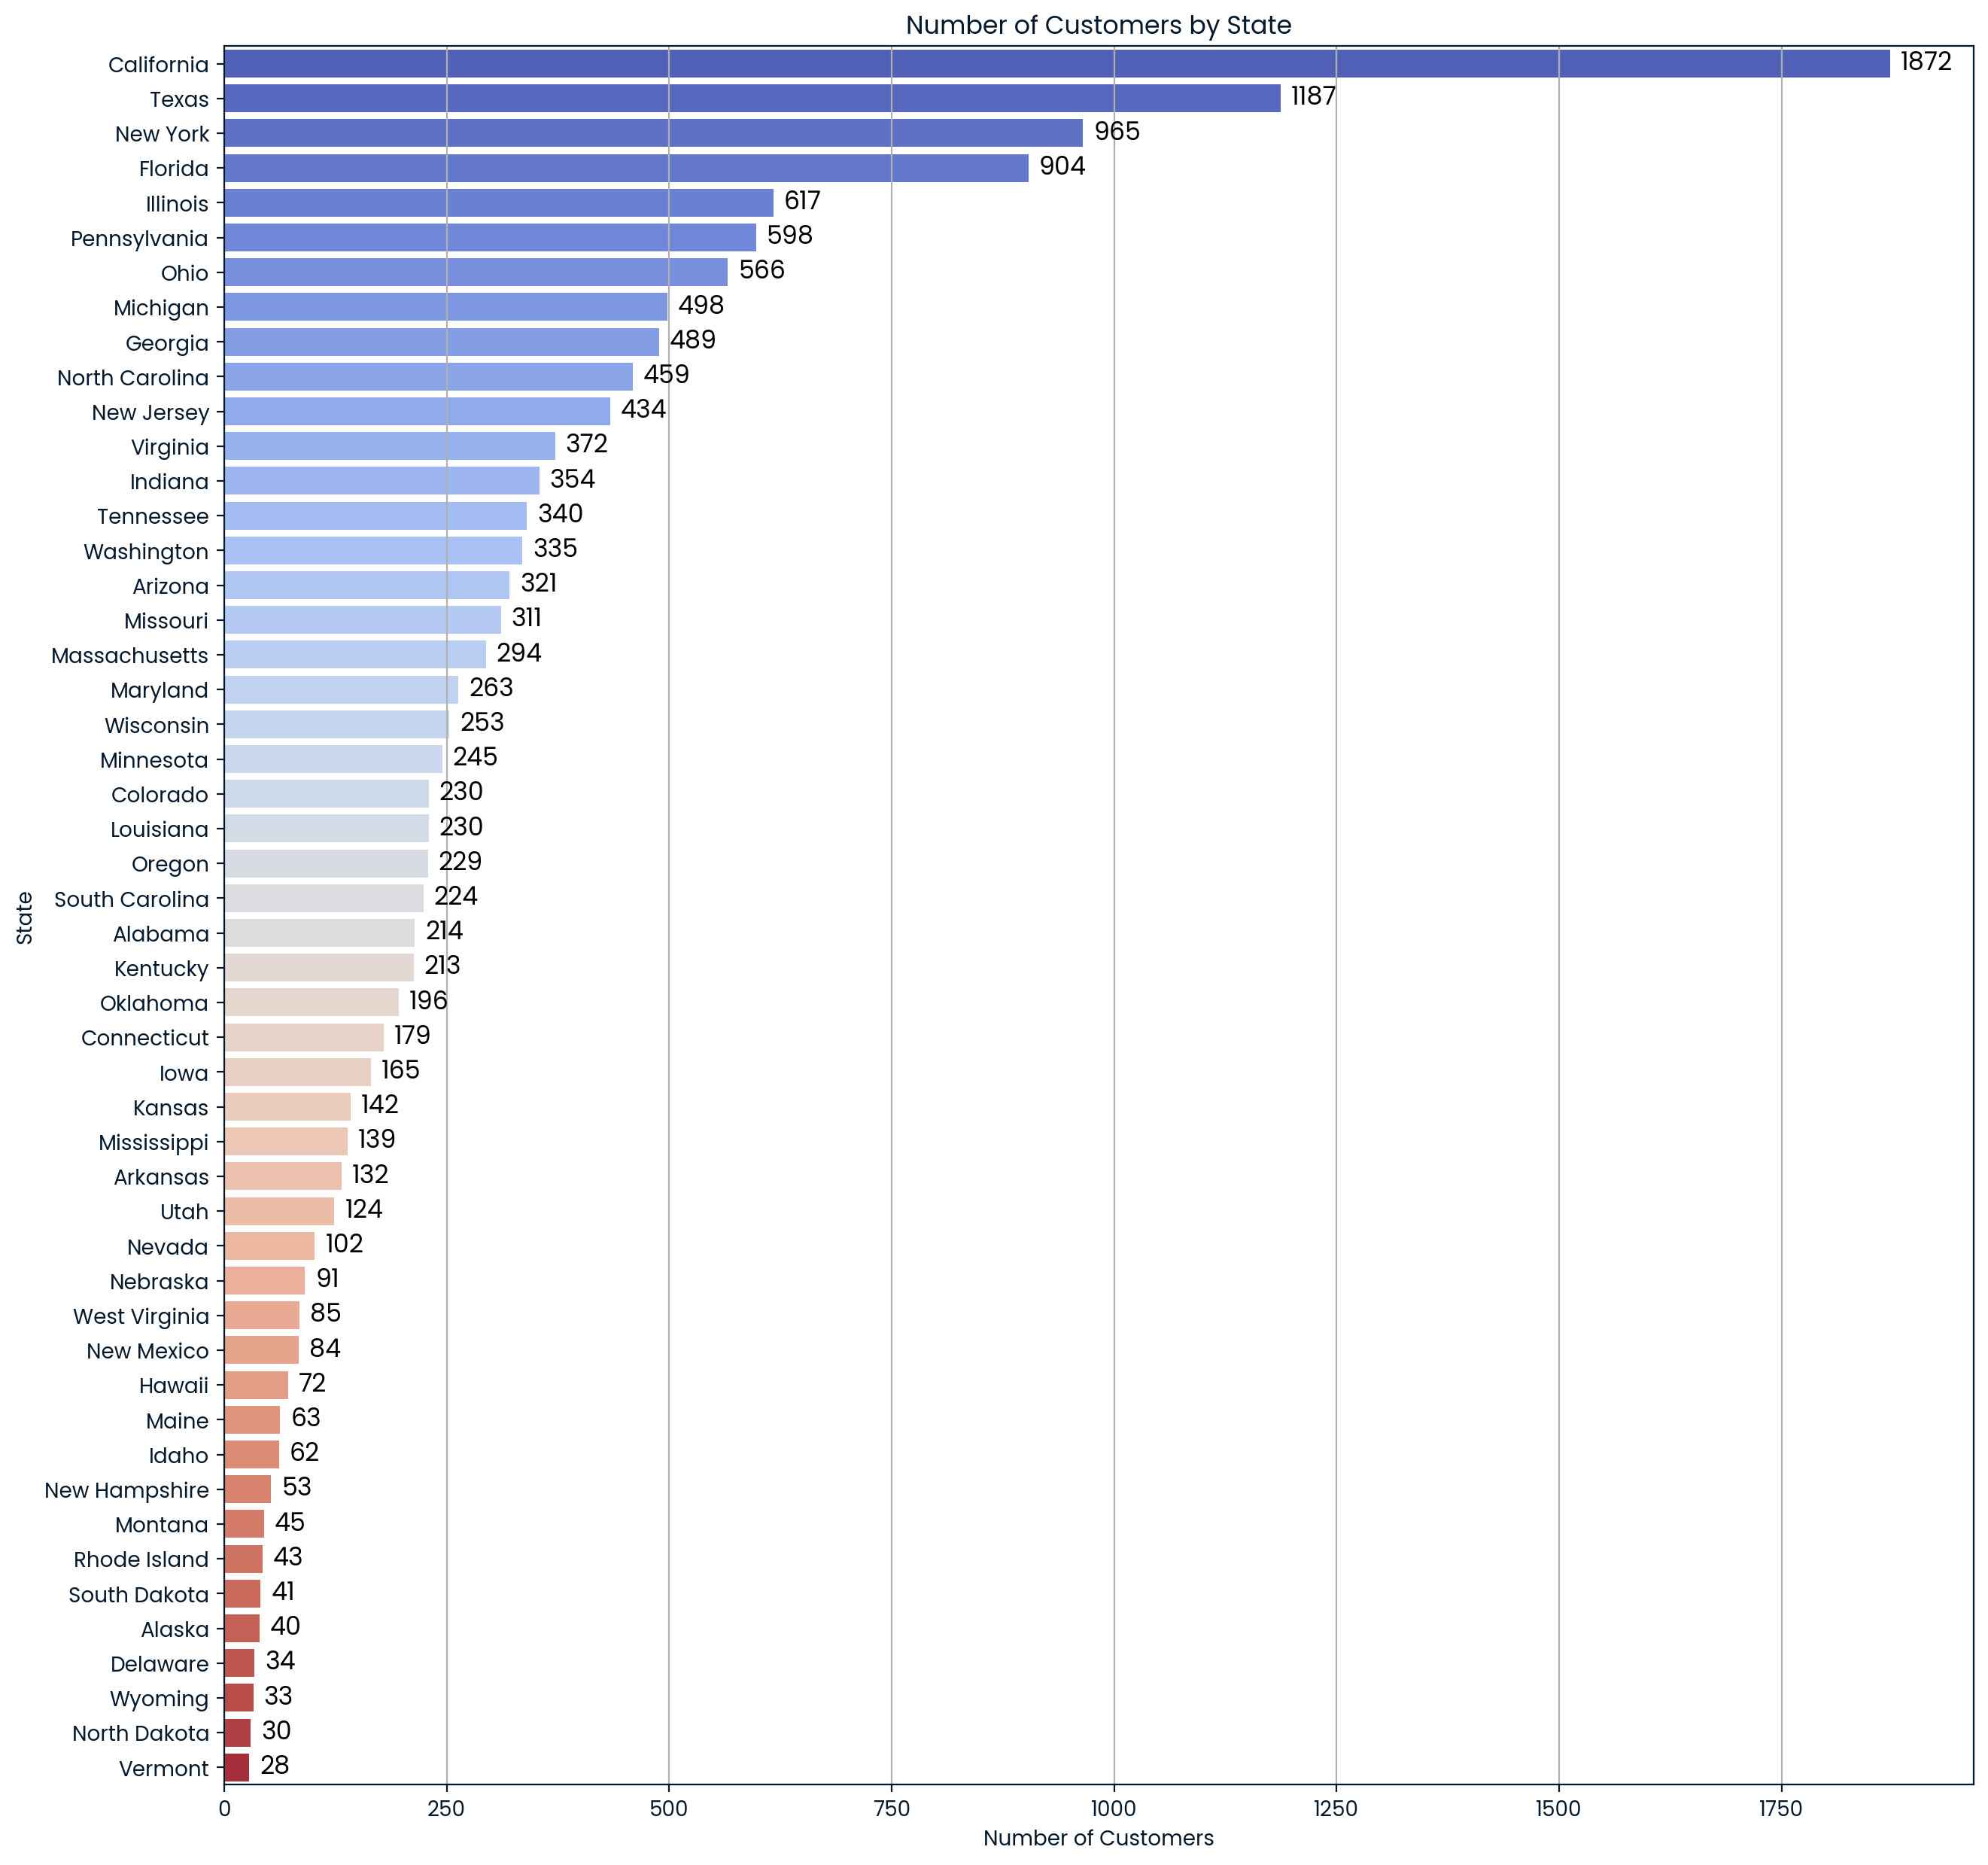

In [149]:
# Bar Chart for Number of Customers by State (Horizontal)
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['State', 'Number of Customers']

plt.figure(figsize=(15, 15))
sns.barplot(x='Number of Customers', y='State', data=state_counts, palette='coolwarm')
plt.title('Number of Customers by State')
plt.xlabel('Number of Customers')
plt.ylabel('State')
plt.grid(axis='x')

# Add horizontal value labels on the bars, raised up a little
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_width())}',  # Change from p.get_height() to p.get_width()
                 (p.get_width(), p.get_y() + p.get_height() / 2.),  # Adjust for horizontal bars
                 ha='left', va='center',  # Align text to the left and center vertically
                 fontsize=12, color='black', 
                 xytext=(5, 0), textcoords='offset points',  # Offset slightly to the right
                 rotation=0)  # No rotation needed for horizontal placement
plt.savefig('customers_state.png')
plt.show()

**Number of Customers by State**

Top States: California, Texas, and New York have the highest number of customers, with California leading significantly (1,872 customers), followed by Texas (1,187) and New York (965). There’s a steep drop-off after the top three states, indicating a concentration of customers in a few key states.
Mid-Tier States: Florida, Illinois, and Pennsylvania also have a notable number of customers, ranging from around 600 to 900, but far less than California.
Low-Tier States: States like Vermont, North Dakota, and Wyoming have very low numbers, each with fewer than 50 customers, suggesting limited market presence.


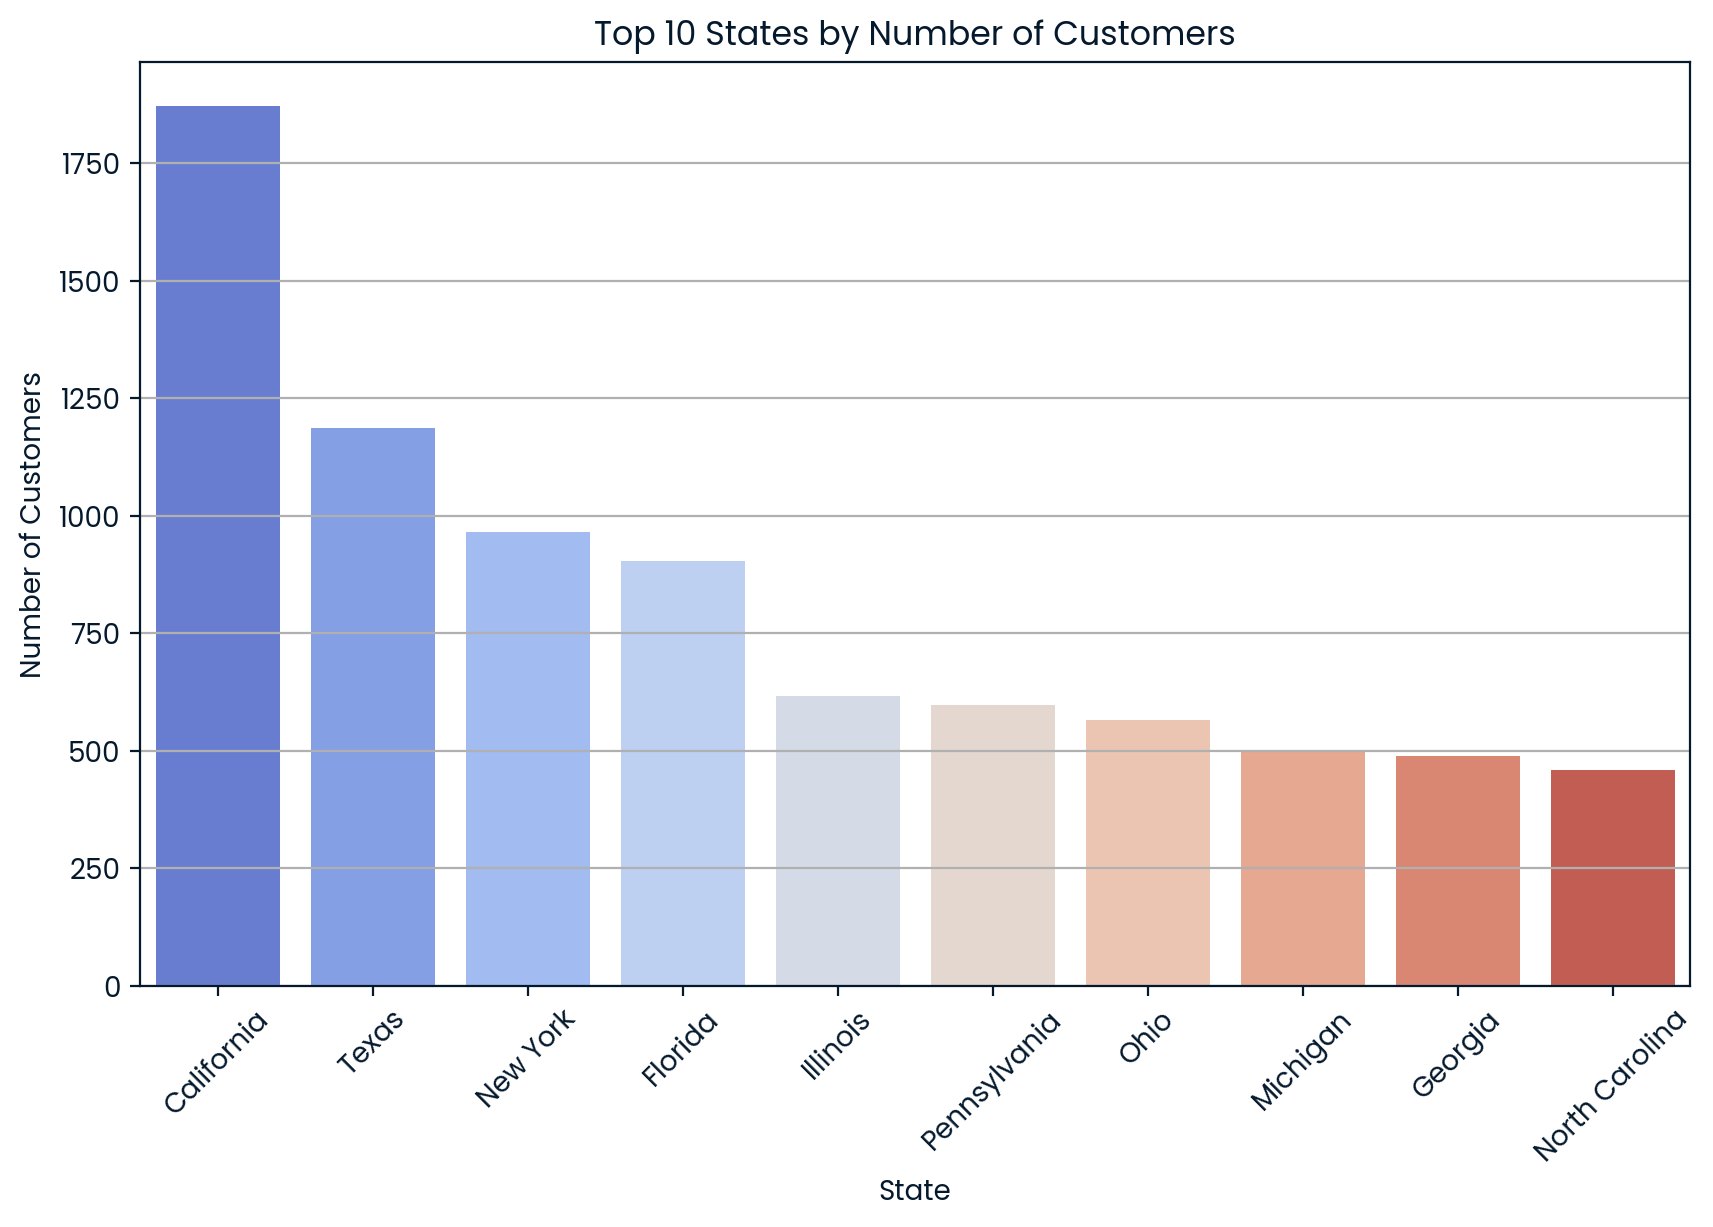

In [150]:
# Example for the top 10 states by number of customers
top_states = df['state'].value_counts().nlargest(10).reset_index()
top_states.columns = ['State', 'Number of Customers']

plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Number of Customers', data=top_states, palette='coolwarm')
plt.title('Top 10 States by Number of Customers')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('Top10states_customers.png')
plt.show()


**Cumulative Number of Customers by State**

 The cumulative graph illustrates a steep rise initially, with California, Texas, and New York contributing to a large portion of the total. The curve flattens gradually, showing smaller additions from lower-ranked states. The flattening towards the right indicates that a large number of states contribute relatively few customers, implying a potential opportunity for growth or indicating focused operations.


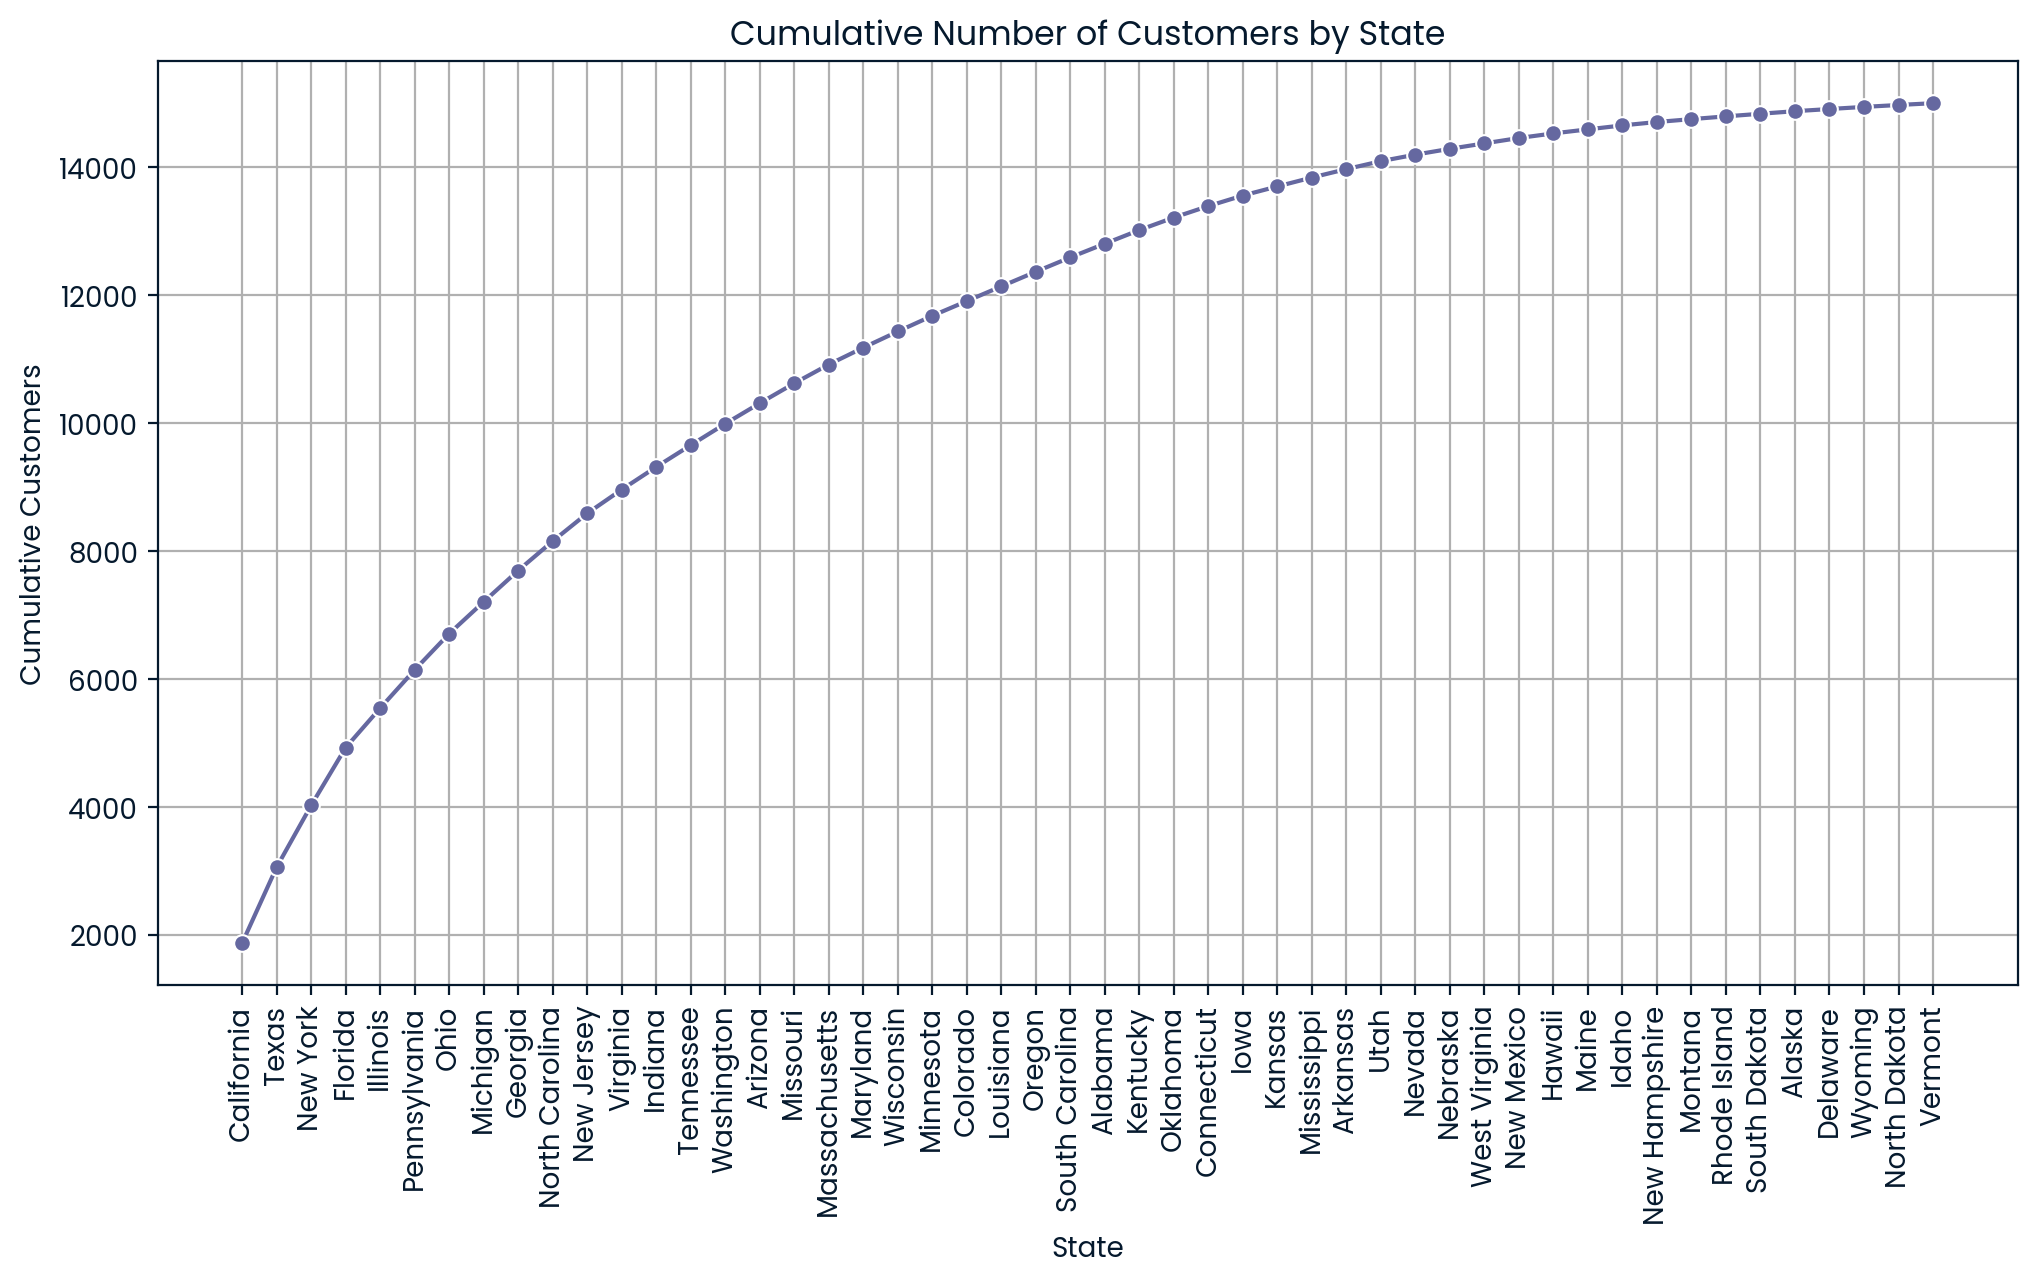

In [151]:
# Cumulative distribution for Number of Customers by State
cumulative_state_counts = df['state'].value_counts().cumsum().reset_index()
cumulative_state_counts.columns = ['State', 'Cumulative Customers']

plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulative_state_counts, x='State', y='Cumulative Customers', marker='o')
plt.title('Cumulative Number of Customers by State')
plt.xlabel('State')
plt.ylabel('Cumulative Customers')
plt.xticks(rotation=90)
plt.grid()
plt.savefig('cumulativecustomers_state.png')
plt.show()


## Summary Insights

In [156]:
# Summary statistics of the dataset
summary_stats = df.describe()
print(summary_stats)

               week       nb_sold  ...  years_as_customer  nb_site_visits
count  15000.000000  15000.000000  ...       15000.000000    15000.000000
mean       3.098267     10.084667  ...           4.963800       24.990867
std        1.656420      1.812213  ...           5.026295        3.500914
min        1.000000      7.000000  ...           0.000000       12.000000
25%        2.000000      9.000000  ...           1.000000       23.000000
50%        3.000000     10.000000  ...           3.000000       25.000000
75%        5.000000     11.000000  ...           7.000000       27.000000
max        6.000000     16.000000  ...          39.000000       41.000000

[8 rows x 5 columns]


Revenue by Sales Method: The Email + Call method yielded the highest median revenue and displayed a broad range of revenue, indicating effectiveness in generating higher sales. It also demonstrated higher variability, suggesting it resonates well with some high-value customers.
Email generated stable revenue around a median value, with fewer outliers, showing it to be a consistent but moderate performer.
Call showed the lowest median revenue with a narrow spread, indicating consistently low returns across customers.
Customer Engagement and Revenue:

Customers exposed to the Email + Call method tended to have higher revenue as their site visits increased, pointing to a strong correlation between this combined approach and customer engagement.
In contrast, the Call method didn’t produce a significant increase in revenue, even with higher site visits, suggesting that this method may lack sufficient impact on driving revenue alone.
Revenue Trends Over Time:

Email initially achieved the highest revenue but saw a significant drop over the six-week period. This pattern implies that while the initial response to Email alone was strong, its impact wanes over time.
The Email + Call method showed steady revenue growth, peaking in week five, and maintained its effectiveness longer than Email alone.
Call showed gradual growth but remained the least effective in revenue generation over the observed period.
Customer Distribution by Sales Method:

Email was the most used method, reaching 7,466 customers, likely due to its lower time demands.
Call reached 4,962 customers, while Email + Call reached only 2,572 customers, potentially due to the additional effort required.
These differences highlight that Email alone is the preferred choice for efficiency, whereas the Email + Call combination, despite reaching fewer customers, shows superior revenue potential per engagement.
Product Sales Patterns:

Most sales fall within a quantity range of 8-12 products, with a right-skewed distribution indicating a preference for smaller purchase quantities.
Higher revenue values correspond with higher quantities sold, though revenue varies at similar product quantities, suggesting factors like pricing strategies or discounts may influence purchasing.
Regional Insights:

Customer concentration is highest in California, Texas, and New York. These states make up a large proportion of total customers, while several other states show minimal customer engagement, indicating potential for regional growth or a need for tailored strategies in lower-performing regions.

# Business Metric

Since the goal of this analysis is to identify the most effective sales method for the new product line, I recommend tracking the percentage of revenue generated by each sales method (Email, Call, and Email + Call) over time as a key metric. Proper monitoring of this metric will guide future resource allocation to the most effective method.

In [158]:
import pandas as pd


# Check if 'revenue' column has been converted to numeric
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Calculate the total revenue
total_revenue = df['revenue'].sum()

# Calculate revenue per sales method
revenue_per_method = df.groupby('sales_method')['revenue'].sum()

# Calculate the percentage of total revenue for each sales method
percentage_revenue_per_method = (revenue_per_method / total_revenue) * 100

# Display the results
print("Total Revenue:", total_revenue)
print("\nRevenue per Sales Method:\n", revenue_per_method)
print("\nPercentage of Total Revenue per Sales Method:\n", percentage_revenue_per_method)


Total Revenue: 1433488.8900000001

Revenue per Sales Method:
 sales_method
Call            236445.16
Email           724312.78
Email + Call    472730.95
Name: revenue, dtype: float64

Percentage of Total Revenue per Sales Method:
 sales_method
Call            16.494384
Email           50.527966
Email + Call    32.977650
Name: revenue, dtype: float64


Based on this output, here’s the results:  
1. Total Revenue: The total revenue generated across all methods is 1,433,488.89.  
2. Revenue per Sales Method:  
- Call: Generated 236,445.16 in revenue. 
- Email: Generated the highest revenue at 724,312.78. 
- Email + Call: Generated 472,730.95 in revenue. 
3. Percentage of Total Revenue per Sales Method: 
-  Call: Accounts for 16.49% of total revenue.
-  Email: Accounts for 50.53% of total revenue, making it the largest contributor. 
-  Email + Call: Contributes 32.98% of total revenue.

The Email method is currently the most effective in terms of total revenue contribution, accounting for over half of all revenue. However, the Email + Call method, while less frequently used, still contributes nearly a third of the revenue, suggesting that it could be valuable when applied selectively for high-potential customers. The Call-only method appears to be the least effective in revenue generation, contributing only about 16.5%.
However, it is important to note that additional factors have been observed. The 'Email + Call' method had customers with more website visits and higher average number of items purchased. Moreover, this method demonstrated a steady increase in revenue growth over the six-week period. In contrast, the 'Call' method showed high revenue in week 1 but decreased over time.

# Recommendation

1. Email should continue to be a primary sales tactic since it generates the largest percentage of income. To maintain client engagement over time, think about sending follow-up emails or running targeted promos.
2. Despite being less common, Email + Call generates a significant amount of income, particularly from clients with high levels of engagement. To optimize returns, target this strategy with high-value clients.
3. The lowest income contribution from call-only suggests that it might not be as effective when used alone. To boost impact, think about integrating quick pre-call emails with phone calls.
4. To take advantage of client density, focus your efforts in high-performing states like California, Texas, and New York. Investigate customized campaigns to increase visibility in states with poor engagement.
5. Variability in revenue indicates that some clients might react favorably to incentives such as discounts or bulk pricing. The average order value might increase and larger purchases could be encouraged by offering tiered pricing.
6. To gauge efficacy over time, monitor the revenue % by approach. As revenue trends change, reallocate resources to the most effective strategies.